### 1. Jelaskan variabel-variabel yang akan dipakai dari dataset tersebut!

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

# initial and read dataset
world_happiness_report_2019 = pd.read_csv('world happiness report - 2019.csv')

# print dataset in table
world_happiness_report_2019


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


Penjelasan tiap variabel:
- <b>Overall rank</b> : ranking secara keselurahan dari seluruh country atau region. Ranking berdasarkan nilai tertinggi dari penilaian yang telah dbuat, dengan nilai tertinggi sebagai peringkat teratas.
- <b>Country or region</b> : nama negara atau wilayah yang dinilai tingkat kebahagiaannya.
- <b>Score</b> : metrik untuk menilai seberapa bahagia seseorang berdasarkan pertanyaan "seberapa bahagia anda pada sebuah ..."
- <b>GDP per capita</b> : sebesar apa pengaruh GDP berkontribusi pada penghitungan skor Kebahagiaan.
- <b>Social support</b> : seberapa berpengaruh hubungan sosial seseorang terhadao tingkat kesenangannya.
- <b>Healthy life expectancy</b> : seberapa besar harapan seseorang terhadap kesehatannya, apakah ingin sehat atau menghiraukan kesehatannya.
- <b>Freedom to make life choices</b> : seberapa bebas seseorang dalam menentukan pilihan hidupnya.
- <b>Generosity</b> : seberapa dermawan seseorang.
- <b>Perceptions of corruption</b> : pandangan terhadap korupsi, apakah mereka peduli dengan isu tersebut atau hanya biasa-biasa saja.

### 2. Tentukan hubungan yang ingin diprediksi dengan regresi linier! Hint: tentukan VI dan VD

- Variabel dependen : Overall rank
- Variabel independen : country or region, score, GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption.

Hubungan yang diprediksi adalah apakah persepsi seseorang terhahap korupsi mempengaruhi tingkat score kebahagiaan. Dalam hal ini, jika score makin tinggi, maka semakin baik hasil overall rank dan sebaliknya.

### 3. Jelaskan dasar teori dari hubungan tersebut. Makin banyak sumber makin baik. Tidak boleh wikipedia atau blog tidak jelas.

Dasar teorinya adalah orang yang peduli dengan isu korupsi akan lebih menjaga sikapnya dalam hal korupsi dengan menghindari segala hal yang berbau korupsi, sedangkan yang merasa itu biasa-biasa saja akan melakukan hal tersebut tanpa ada rasa bersalah. 
Dapat dilihat pada link direferensi, wilayah-wilayah yang tingkat korupsinya tinggi, memiliki tingkat kebahagiaan yang relatif rendah.

Referensi artikel:
- https://www.brainlatam.com/blog/corrupted-nations-unhappy-people-and-their-relanshionship-with-well-being.-1059
- https://gipa.ge/uploads/files/Anderson%201-1.pdf

### 4. Lakukan regresi linier dengan Python sesuai tutorial. Lakukan modifikasi kode bila perlu. Dilarang menggunakan statsmodel, sklearn, maupun library ML lainnya. Numpy boleh.

In [187]:
# select and init dataframe country or region, score and perceptions of corruption
df = world_happiness_report_2019[['Overall rank', 'Country or region', 'Score', 'Perceptions of corruption']]

# print dataframe
df

,Overall rank,Country or region,Score,Perceptions of corruption
0,1,Finland,7.769,0.393
1,2,Denmark,7.600,0.410
2,3,Norway,7.554,0.341
3,4,Iceland,7.494,0.118
4,5,Netherlands,7.488,0.298
5,6,Switzerland,7.480,0.343
6,7,Sweden,7.343,0.373
7,8,New Zealand,7.307,0.380
8,9,Canada,7.278,0.308
9,10,Austria,7.246,0.226


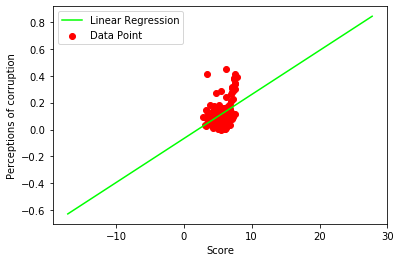

In [188]:
# initial value of Score and Perceptions of corruption
score                     = world_happiness_report_2019['Score'].values
perceptions_of_corruption = world_happiness_report_2019['Perceptions of corruption'].values

# mean of score and perceptions_of_corruption
x_mean = np.mean(score)
y_mean = np.mean(perceptions_of_corruption)

# total number of values
n = len(score)

# using the formula to calculate the b1 and b2
numerator   = 0
denominator = 0

for i in range(n):
    numerator   += (score[i] - x_mean) * (perceptions_of_corruption[i] - y_mean)
    denominator += (score[i] - x_mean) ** 2
    
b1 = numerator / denominator
b2 = y_mean - (b1 * x_mean)

# plotting values
x_max = np.max(score) + 20
x_min = np.min(score) - 20

# plotting line
plt.plot(x, y, color='#00FF00', label='Linear Regression')

# calculating line values of x and y
x = np.linspace(x_min, x_max, 20)
y = b2 + b1 * x

# plot the data point
plt.scatter(score, perceptions_of_corruption, color='#FF0000', label='Data Point')
plt.xlabel('Score')
plt.ylabel('Perceptions of corruption')
plt.legend()

# print plot
plt.show()

### 5. Tuliskan simpulannya! Hint: cek nilai intercept/bias dan koefisien yang dihasilkan lalu jelaskan arah dan besar efek VI ke VD.

Kemungkinan persepsi seseorang terhadap korupsi, mempengaruhi tingkat score (kebahagiaan) seseorang. Tapi yang menarik dari plot, dapat dilihat range score terhadap persepsi korupsi, ternyata tidak berbeda jauh satu sama lain. Semua data point berada pada range yang tidak berbeda jauh secara signifikan.

In [189]:
# print the coefficient
print('Coefficients   :', b1)
print('Intercept/Bias :', b2)

Coefficients   : 0.03275031380812131
Intercept/Bias : -0.06648153172658319


Hubungan antara variabel score dan perceptions_of_corruption sangat kuat (Homoscedasticity), signifikan, keterkaitan (korelasi) independent variable terhadap dependent variabel memang nyata, dan bukan terjadi karena kebetulan

Thank you for https://www.kaggle.com/ to provided this dataset <br>
Source dataset : https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv